In [1]:
# import  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'data_files/top10s.csv'

# Load the dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   Unnamed: 0                 title      artist        top genre  year  bpm  \
0           1      Hey, Soul Sister       Train       neo mellow  2010   97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2           3               TiK ToK       Kesha        dance pop  2010  120   
3           4           Bad Romance   Lady Gaga        dance pop  2010  119   
4           5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78  


In [5]:
# technical summary
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [7]:
# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# rename columns to be more descriptive.
df.rename(columns={
    'title': 'Title',
    'artist': 'Artist',
    'top genre': 'Genre',
    'year': 'Year',
    'dnce': 'Danceability',
    'nrgy': 'Energy',
    'dB': 'Loudness_dB', # dB is a special character, better to rename
    'live': 'Liveness',
    'val': 'Valence',
    'dur': 'Duration_s',
    'acous': 'Acousticness',
    'spch': 'Speechiness',
    'pop': 'Popularity'
}, inplace=True)


print("\nDataFrame with cleaned column names:")
print(df.head())


DataFrame with cleaned column names:
                  Title      Artist            Genre  Year  bpm  Energy  \
0      Hey, Soul Sister       Train       neo mellow  2010   97      89   
1  Love The Way You Lie      Eminem  detroit hip hop  2010   87      93   
2               TiK ToK       Kesha        dance pop  2010  120      84   
3           Bad Romance   Lady Gaga        dance pop  2010  119      92   
4  Just the Way You Are  Bruno Mars              pop  2010  109      84   

   Danceability  Loudness_dB  Liveness  Valence  Duration_s  Acousticness  \
0            67           -4         8       80         217            19   
1            75           -5        52       64         263            24   
2            76           -3        29       71         200            10   
3            70           -4         8       71         295             0   
4            64           -5         9       43         221             2   

   Speechiness  Popularity  
0            4     

In [9]:
# Group by year and calculate the mean of the audio features
yearly_features = df.groupby('Year')[['Danceability', 'Energy', 'Loudness_dB', 'Acousticness']].mean().reset_index()



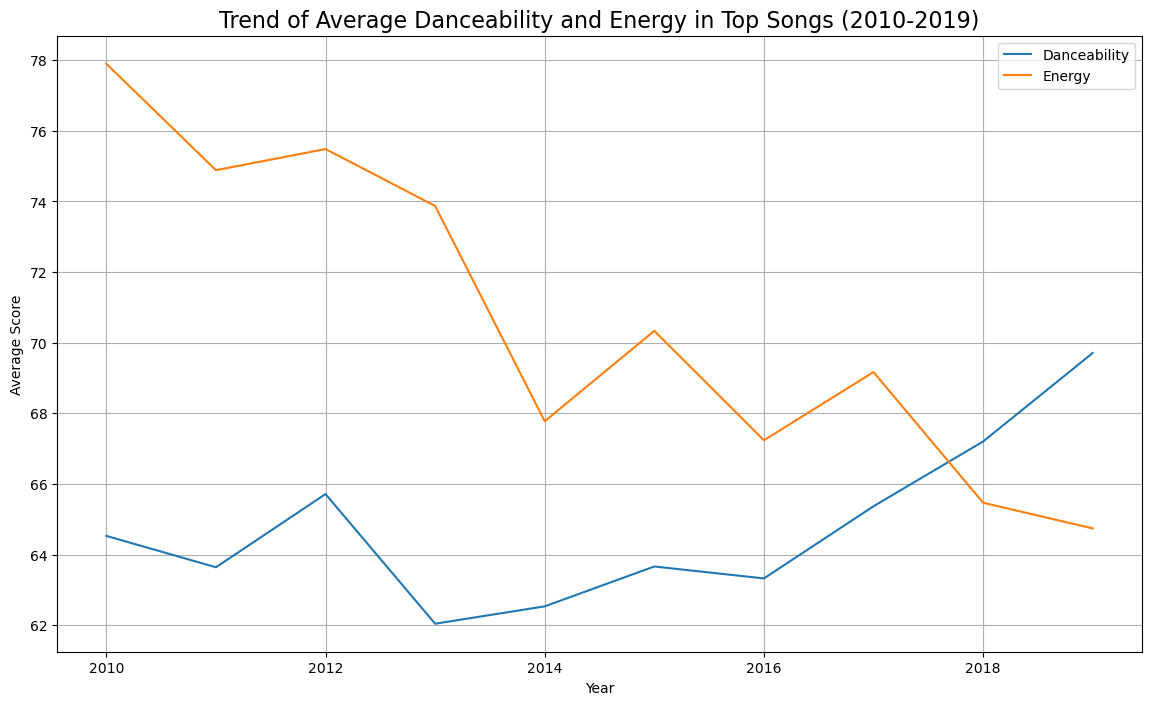

In [11]:
# Plotting the trends
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Danceability', data=yearly_features, label='Danceability')
sns.lineplot(x='Year', y='Energy', data=yearly_features, label='Energy')
plt.title('Trend of Average Danceability and Energy in Top Songs (2010-2019)', fontsize=16)
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
#plt.savefig('music_trends.png')
plt.show()

The line chart reveals interesting trends. We see Energy levels slightly decreasing over the decade, while Danceability increases especially from 2018. This could suggest a shift in pop music towards more rhythm-focused but less "intense" tracks.

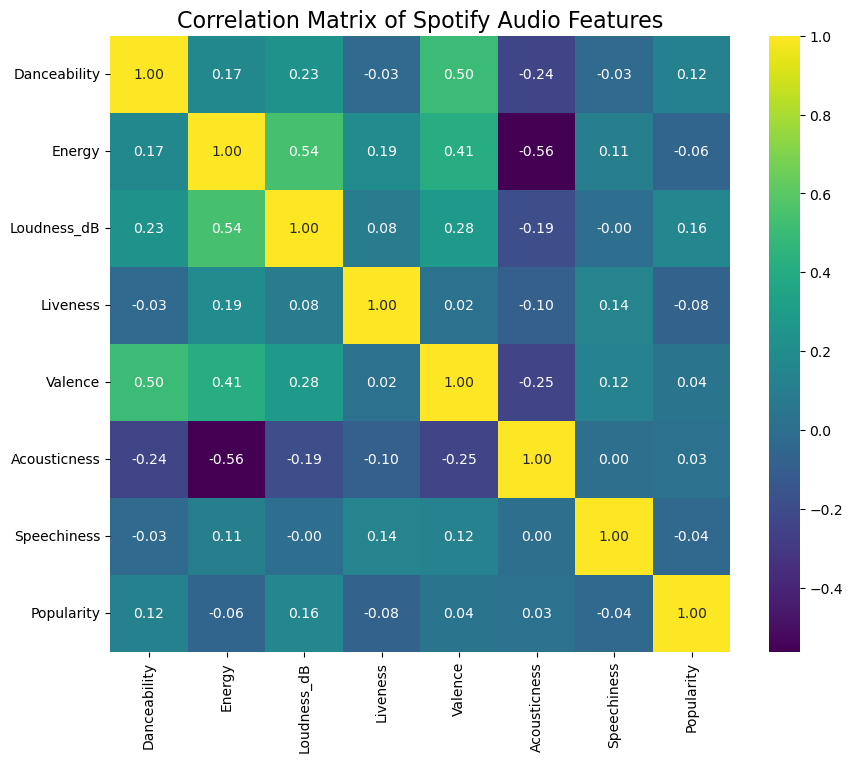

In [13]:
# Select only the numeric audio feature columns for the correlation matrix
audio_features = df[['Danceability', 'Energy', 'Loudness_dB', 'Liveness', 'Valence',
                     'Acousticness', 'Speechiness', 'Popularity']]

correlation_matrix = audio_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Spotify Audio Features', fontsize=16)
#plt.savefig('features_heatmap.png')
plt.show()

The heatmap shows a strong positive correlation between Energy and Loudness_dB of 0.54. This makes intuitive sense: more energetic songs are usually recorded at a higher volume.

We see a negative correlation between Acousticness and Energy (-0.56), suggesting that less-plugged-in, acoustic tracks are generally lower in energy.